### Import Libraries

In [105]:
# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data wrangling
from scipy.stats import randint as sp_randint
import numpy as np

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

### Load the Data...

In [2]:
# get the data
survey_df = pd.read_csv("ACME-HappinessSurvey2020.csv")

### Exploratory Data Analysis

In [3]:
# Display the data
survey_df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
# Display data type
survey_df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [5]:
# Find missing values
survey_df.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

` We can already observe that there are no missing values in the dataset and that all the columns are integers. `

### A description of the features is listed below:

---

   Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.
   
      Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
      X1 = my order was delivered on time
      X2 = contents of my order was as I expected
      X3 = I ordered everything I wanted to order
      X4 = I paid a good price for my order
      X5 = I am satisfied with my courier
      X6 = the app makes ordering easy for me

In [6]:
# display general statistics of data
survey_df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


`From the statistics above, in terms of ordered content, most of the customers expectations were sort of dashed.` This metric received the lowest average in terms of satisfaction (2.5)

In [7]:
survey_df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [8]:

unhappy = survey_df.loc[survey_df["Y"]==0, :]
happy = survey_df.loc[survey_df["Y"]==1,:]

c:\Users\evans\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\Users\evans\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid d

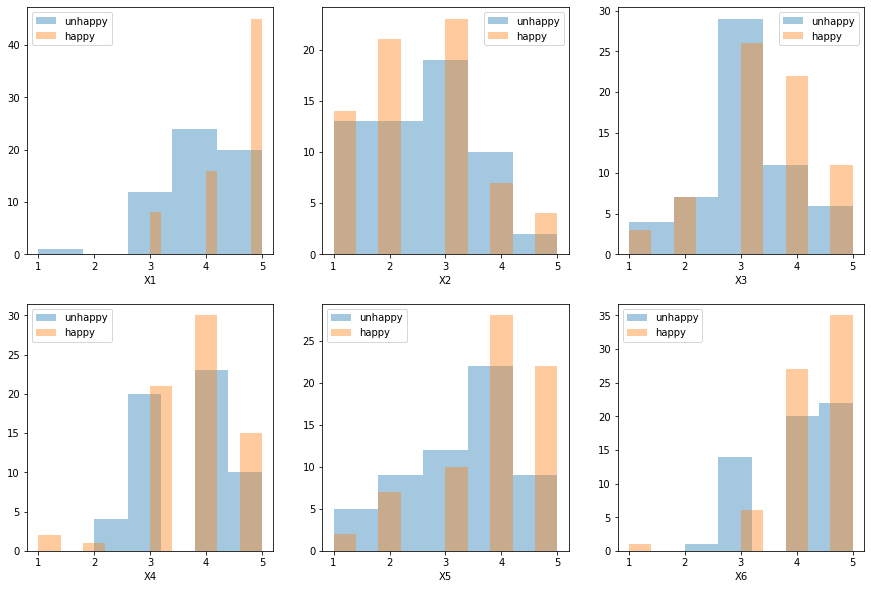

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax = sns.distplot(unhappy["X1"], label = "unhappy", kde=False, bins =5, ax = axes[0,0])
ax = sns.distplot(happy["X1"], label = "happy", kde=False, bins =10, ax = axes[0,0])
ax.legend()
ax = sns.distplot(unhappy["X2"], label = "unhappy", kde=False, bins =5, ax = axes[0,1])
ax = sns.distplot(happy["X2"], label = "happy", kde=False, bins =10, ax = axes[0,1])
ax.legend()
ax = sns.distplot(unhappy["X3"], label = "unhappy", kde=False, bins =5, ax = axes[0,2])
ax = sns.distplot(happy["X3"], label = "happy", kde=False, bins =10, ax = axes[0,2])
ax.legend()
ax = sns.distplot(unhappy["X4"], label = "unhappy", kde=False, bins =5, ax = axes[1,0])
ax = sns.distplot(happy["X4"], label = "happy", kde=False, bins =10, ax = axes[1,0])
ax.legend()
ax = sns.distplot(unhappy["X5"], label = "unhappy", kde=False, bins =5, ax = axes[1,1])
ax = sns.distplot(happy["X5"], label = "happy", kde=False, bins =10, ax = axes[1,1])
ax.legend()
ax = sns.distplot(unhappy["X6"], label = "unhappy", kde=False, bins =5, ax = axes[1,2])
ax = sns.distplot(happy["X6"], label = "happy", kde=False, bins =10, ax = axes[1,2])
ax.legend()
plt.show()

### Building Machine Learning Models

Define the features set, by copying the `surver_df` DataFrame and dropping the `Y` column.

In [10]:
# Define features set
X = survey_df.copy()
X.drop('Y', axis=1, inplace=True)
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


Create the target vector by assigning the values of the `Y` column from the `survey_df` DataFrame.

In [11]:
# Define target vector
y = np.ravel(survey_df["Y"])
y[:5]


array([0, 0, 1, 0, 0], dtype=int64)

In [12]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Stochastic gradient descent (SGD) learning

In [96]:
# create a SGD classifier instance
sgd = linear_model.SGDClassifier(max_iter=200, tol=None, random_state=50)

# Fitting the model
sgd.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = sgd.predict(X_test)

# Display the accuracy score for the test dataset.
acc_sgd = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_sgd,2,)} %")

accuracy_score: 62.5 %


#### Random Forest Learning

In [61]:
# create a random forest instance
random_forest = RandomForestClassifier(n_estimators=100, random_state=50)

# Fitting the model
random_forest.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = random_forest.predict(X_test)

# Display the accuracy score for the test dataset.
acc_random_forest = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_random_forest,2,)} %")

accuracy_score: 56.25 %


#### Logistic regression learning

In [51]:
# create a logistic regression instance
logreg = LogisticRegression(max_iter=200, random_state=78)

# Fitting the model
logreg.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = logreg.predict(X_test)

# Display the accuracy score for the test dataset.
acc_log = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_log,2,)} %")

accuracy_score: 50.0 %


#### Perceptron Learning

In [53]:
# create a perceptron instance
perc = Perceptron(random_state=101)

# Fitting the model
perc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = perc.predict(X_test)

# Display the accuracy score for the test dataset.
acc_perc = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_perc,2,)} %")

accuracy_score: 59.38 %


#### Linear Support Vector Classifier

In [54]:
# create a linear SVC instance
linear_svc = LinearSVC( max_iter=5000)

# Fitting the model
linear_svc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = linear_svc.predict(X_test)

# Display the accuracy score for the test dataset.
acc_linear_svc = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_linear_svc,2,)} %")

accuracy_score: 50.0 %


#### Gradient Boosting Classifier

In [58]:
# create a gradient boosting instance
gbc=GradientBoostingClassifier(n_estimators=100, random_state=50)

# Fitting the model
gbc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = gbc.predict(X_test)

# Display the accuracy score for the test dataset.
acc_gbc = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_gbc,2,)} %")

accuracy_score: 56.25 %


#### Decision Tree Classifer

In [59]:
# create a decision tree classifier instance
decision_tree = DecisionTreeClassifier(random_state=50)
# Fitting the model
decision_tree.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = decision_tree.predict(X_test)

# Display the accuracy score for the test dataset.
acc_decision_tree = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_decision_tree,2,)} %")

accuracy_score: 50.0 %


In [20]:
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Logistic Regression', 'Support Vector Machines',
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_gbc, acc_log, acc_linear_svc,
              acc_random_forest, acc_perc, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False).set_index('Score')
result_df

,Model
Score,
62.500,Stochastic Gradient Decent
59.375,Perceptron
56.250,Random Forest
53.125,Gradient Boosting
50.000,Logistic Regression
50.000,Support Vector Machines
50.000,Decision Tree


`Obviously, stochastic Gradient Descent had the highest accuracy score. Now let's perform cross validation to ascertain the model generalization`

#### Evaluate the stochastic gradient descent model using cross validation

In [21]:
# Import cross val score 
from sklearn.model_selection import cross_val_score

# create a stochastic gradient descent model instance
sdg = linear_model.SGDClassifier(max_iter=200, tol=None, random_state=50)

# set cross validation splitting strategy to 5
scores_rf = cross_val_score(sdg, X_train, y_train, cv=5, scoring = "accuracy")


In [22]:
# cross validation score for stochastic gradient descent model
print("Scores_sgd:", scores_rf)
print("Mean_sdg:", scores_rf.mean())
print("Standard Deviation_sdg:", scores_rf.std())

Scores_sgd: [0.47368421 0.47368421 0.57894737 0.57894737 0.55555556]
Mean_sdg: 0.5321637426900585
Standard Deviation_sdg: 0.04850629556333972


`With a k-fold of 5, our model has an accuracy of approx 53% with a standard deviation of 4%. Below I attempted to increase the model accuracy.`

### Feature Importance

In [23]:
# Random Forests in sklearn will automatically calculate feature importance
# We can then sort the features by their importance
importances = pd.DataFrame(sorted(zip(random_forest.feature_importances_, X.columns), reverse=True))
importances = importances.rename(columns={0:'importance', 1:'feature'})
importances = importances.set_index(['feature'])
importances

,importance
feature,
X5,0.190819
X2,0.184627
X3,0.177995
X1,0.169431
X4,0.139641
X6,0.137486


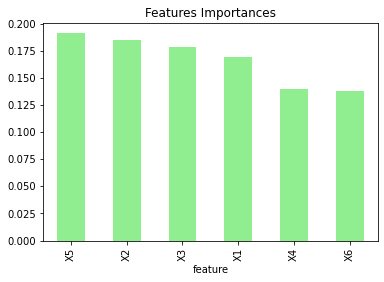

In [24]:
# Visualize the features by importance
importances.plot.bar(color='lightgreen', title= 'Features Importances', legend=False)

`From the feature importance chart, it appears that all feature may be significant when predicting a customer's happiness since their feature ranks in the same range. Thus all feature needs to be preserved in the next survey`

### HyperParameter Tuning

`Now let's evaluate the model accuracy using a more accurate method: out-of-bags sample.`

In [25]:
# create a random forest instance
random_forest = RandomForestClassifier(n_estimators=100, random_state=78, oob_score=True,)

# Fitting the model
random_forest.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = random_forest.predict(X_test)

# Return the mean accuracy on the given test data and labels
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

# out-of-bags sample evaluation
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 58.51 %


#### Randomized Search CV

In [65]:
# Tune the parameters to improve the accuracy
def tune_SDGClassifier_hyper_params(X_test, X_train, y_train, y_test):
    # Import modules
    from sklearn import linear_model
    from sklearn.linear_model import SGDClassifier
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score
    
    print ("-- {} --".format("Fine-tuning Stochastic Gradient Descent Classifier"))
    
    # initialize the hyperparameters
    loss = ['perceptron', 'hinge','squared_error',
            'log', 'modified_huber']
    penalty = ['l1', 'l2', 'elasticnet'] 
    alpha = sp_randint (0.001, 1000)
    learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
    eta0 = sp_randint(1,100)

    # input parameters
    param_dist = dict(
                        loss=loss,
                        learning_rate=learning_rate,
                        penalty=penalty,
                        alpha=alpha,
                        eta0=eta0
                )

    # build SDG instance 
    sdg = linear_model.SGDClassifier(random_state = 78)

    # Randomized search
    n_iter_search = 1000
    random_search = RandomizedSearchCV(estimator=sdg, 
                                        param_distributions=param_dist, 
                                        n_jobs=-1,
                                        n_iter= n_iter_search, 
                                        cv=10,
                                        verbose =1 )

    print ("--------------------- RandomizedSearchCV begins")
    random_search.fit(X_train, y_train)
    print ("--------------------- RandomizedSearchCV ends")

    return random_search.best_params_, random_search.best_score_ 

tune_SDGClassifier_hyper_params(X_test, X_train, y_train, y_test)

-- Fine-tuning Stochastic Gradient Descent Classifier --
--------------------- RandomizedSearchCV begins
Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
--------------------- RandomizedSearchCV ends


({'alpha': 825,
  'eta0': 4,
  'learning_rate': 'adaptive',
  'loss': 'perceptron',
  'penalty': 'l2'},
 0.6077777777777779)

#### Best hyper parameter using RandomizedCV search

In [63]:
# build SDG instance 
sdg_tuned =linear_model.SGDClassifier(max_iter=200, 
                                        tol=None, 
                                        random_state=50,
                                        alpha= 621,
                                        eta0= 5,
                                        learning_rate= 'adaptive',
                                        loss= 'squared_error',
                                        penalty= 'l1'
                                   )

# # Fitting the model
sdg_tuned.fit(X_train, y_train)

# # Making predictions using the testing data
y_pred_tuned = sdg_tuned.predict(X_test)

# Display the accuracy score for the test dataset.
acc_sdg_tuned = accuracy_score(y_test, y_pred_tuned) * 100
print(f"accuracy_score: {round(acc_sdg_tuned,2,)} %")

accuracy_score: 62.5 %


#### Grid Search CV

In [73]:
# Tune the parameters to improve the accuracy
def tune_SDGClassifier_hyper_params(X_train, y_train):
    # Import modules
    from sklearn import linear_model
    from sklearn.linear_model import SGDClassifier
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV 

    # initialize the hyperparameters
    loss = ['perceptron', 'hinge','squared_error',
            'log', 'modified_huber']
    penalty = ['l1', 'l2', 'elasticnet'] 
    alpha = [0.001, 0.01, 1, 10,100, 1000]
    learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
    # class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
    eta0 = sp_randint(1,100)

    # input parameters
    param_grid = dict(
                        loss=loss,
                        learning_rate=learning_rate,
                        penalty=penalty,
                        # class_weight = class_weight, 
                        alpha=alpha,
                        tol = [0.001, 0.01, 1, 10,100, 1000],
                        eta0=[0.001, 0.01, 1, 10,100, 1000]
                )

    # build SDG instance 
    sdg = linear_model.SGDClassifier(random_state = 78)

    grid = GridSearchCV (
                        estimator=sdg, 
                        param_grid=param_grid, 
                        scoring='f1', 
                        verbose=1, 
                        n_jobs=-1
                    ) 

    grid_result = grid.fit(X_train, y_train) 

    return  grid_result.best_params_, grid_result.best_score_
    
tune_SDGClassifier_hyper_params(X_train, y_train)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


({'alpha': 0.01,
  'eta0': 1,
  'learning_rate': 'invscaling',
  'loss': 'log',
  'penalty': 'l2',
  'tol': 0.001},
 0.7309902740937224)

#### Best hyperparameter using Grid Search CV

In [124]:
# build SDG instance 
sdg_tuned_gridCV =linear_model.SGDClassifier( 
                                        # max_iter=200,
                                        tol=0.001, 
                                        random_state=50,
                                        alpha= 0.01,
                                        eta0= 1,
                                        learning_rate= 'invscaling',
                                        loss= 'log',
                                        penalty= 'l2')

# # Fitting the model
sdg_tuned_gridCV.fit(X_train, y_train)

# # Making predictions using the testing data
y_pred_tuned_gridCV = sdg_tuned_gridCV.predict(X_test)

# Display the accuracy score for the test dataset.
acc_sdg_tuned_gridCV = accuracy_score(y_test, y_pred_tuned_gridCV) * 100
print(f"accuracy_score: {round(acc_sdg_tuned_gridCV,2,)} %")

accuracy_score: 62.5 %


## Further evaluation

#### Confusion Matrix

In [106]:
# Function to plot heatmap of confusion matrix
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

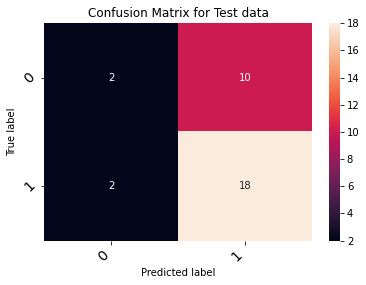

In [108]:
# test data
plot_conf_matrix(confusion_matrix(y_test, sdg_tuned_gridCV.predict(X_test)), "Test data")

#### Confusion Matrix from cross-validated input estimates

In [127]:
# Import modules
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# generate cross-validated estimates for each input data
predictions = cross_val_predict(sdg_tuned_gridCV, X_test, y_test, cv=4)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_df

,Predicted 0,Predicted 1
Actual 0,8,4
Actual 1,14,6


### Classification Report

In [128]:
# Import module for classification
from sklearn.metrics import classification_report

# create target names for classification
target_names = ["unhappy customers", "happy customers"]
print(classification_report(y_test, predictions, target_names=target_names))

                   precision    recall  f1-score   support

unhappy customers       0.36      0.67      0.47        12
  happy customers       0.60      0.30      0.40        20

         accuracy                           0.44        32
        macro avg       0.48      0.48      0.44        32
     weighted avg       0.51      0.44      0.43        32



### Summary